In [113]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [114]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [115]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [116]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [117]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
27586,27587,41,blue-collar,soltero,priamaria,no,1649,si,no,Sin Información,312,16-may-2021,3,-1,0,Sin Información,no
35988,35989,44,services,casado,priamaria,no,2226,si,si,Sin Información,55,13-may-2021,1,-1,0,Sin Información,no
21582,21583,38,management,soltero,universitarios,no,15030,si,no,movil,167,13-may-2021,1,174,7,otro,no


In [118]:
df_train.loc[df_train['target'] == 'no', 'target'] = 0
df_train.loc[df_train['target'] == 'si', 'target'] = 1
df_train['target'] = df_train['target'].astype(int)

In [119]:
df_train.sample(30)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
10931,10932,39,management,casado,universitarios,no,3518,si,no,movil,440,8-may-2021,1,-1,0,Sin Información,0
27955,27956,38,technician,casado,secundaria/superiores,no,635,no,no,Sin Información,31,5-jun-2021,5,-1,0,Sin Información,0
16587,16588,30,admin.,soltero,secundaria/superiores,no,873,no,no,movil,301,7-oct-2021,1,216,2,sin_exito,0
5446,5447,44,technician,casado,secundaria/superiores,no,56,no,no,movil,148,22-aug-2021,8,-1,0,Sin Información,0
42103,42104,64,retired,casado,universitarios,no,846,no,no,movil,671,11-feb-2021,1,181,3,sin_exito,1
24470,24471,48,management,casado,universitarios,no,263,si,no,Sin Información,350,5-may-2021,2,-1,0,Sin Información,0
14573,14574,26,technician,soltero,secundaria/superiores,no,1842,si,si,movil,611,22-jul-2021,1,-1,0,Sin Información,0
15445,15446,48,blue-collar,casado,priamaria,no,1080,si,no,movil,197,11-may-2021,2,-1,0,Sin Información,0
6368,6369,59,retired,casado,secundaria/superiores,no,-48,si,no,Sin Información,224,27-may-2021,1,-1,0,Sin Información,0
16458,16459,40,blue-collar,casado,secundaria/superiores,no,1100,si,no,Sin Información,660,29-may-2021,2,-1,0,Sin Información,0


In [120]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [121]:
# Reemplaza el valor erróneo en la columna 'educacion'
df_train['educacion'] = df_train['educacion'].replace('priamaria', 'primaria')


In [122]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [123]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
23114,45,blue-collar,casado,secundaria/superiores,no,8680,si,no,Sin Información,503,1,-1,0,Sin Información,0
11289,34,services,casado,secundaria/superiores,no,1182,si,no,Sin Información,124,1,-1,0,Sin Información,0
6970,26,management,soltero,universitarios,no,3178,no,no,movil,64,1,-1,0,Sin Información,0


In [124]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
29850,24,-148,641,1,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
28812,30,305,75,1,105,3,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4769,31,247,273,1,-1,0,0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10743,48,313,195,2,-1,0,0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
13812,33,1099,111,5,-1,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [125]:
X = df_train.drop(columns=["target"],inplace=False)
y = df_train["target"]

print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (42446, 37)
Tamaño y (42446,)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [127]:
print("Tamaño X_train",X_train.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train (31834, 37)
Tamaño y_train (31834,)
Tamaño X_test (10612, 37)
Tamaño y_test (10612,)


In [128]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
y_pred_dicotomico = (y_pred > 0.65) *1
print(y_pred_dicotomico)


[1 0 0 ... 0 0 0]


c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
accuracy = accuracy_score(y_test, y_pred_dicotomico)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8921032793064455


In [130]:
# Estandarización controlada

estandarizador = StandardScaler()
estandarizador.fit(X_train)

X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [131]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model_std = LogisticRegression()
model_std.fit(X_train_std, y_train)
y_pred_std = model.predict_proba(X_test_std)[:,1]
y_pred_std_dicotomico = (y_pred_dicotomico > 0.65) *1

accuracy = accuracy_score(y_test, y_pred_std_dicotomico)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8921032793064455


c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [132]:
# 'model' es tu modelo entrenado DecisionTreeClassifier y 'df_train' es tu DataFrame original con las características de entrenamiento
# Selecciona todas las características (X) de tu DataFrame original 'df_train'
X_base_datos = df_train.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

X_base_datos_std=estandarizador.fit_transform(X_base_datos)


# Realiza la predicción utilizando el modelo entrenado
model_std.fit(X_base_datos_std,y)
y_pred_base_datos = model_std.predict_proba(X_base_datos_std)

# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df['target_predicho'] = y_pred_base_datos[:,1]
df['target_predicho_dic'] = df['target_predicho'] > 0.65

df.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
5813,5814,31,blue-collar,soltero,secundaria/superiores,no,58,si,no,Sin Información,542,21-may-2021,1,-1,0,Sin Información,no,0.068625,False
18656,18657,38,management,casado,universitarios,no,1101,si,no,movil,78,9-mar-2021,2,120,1,sin_exito,no,0.042091,False
29115,29116,41,management,soltero,universitarios,no,260,no,no,movil,149,4-aug-2021,1,-1,0,Sin Información,no,0.125683,False


In [133]:
df.sample(10)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
29895,29896,48,blue-collar,casado,priamaria,no,219,si,no,Sin Información,109,29-may-2021,4,-1,0,Sin Información,no,0.005675,False
38927,38928,43,blue-collar,casado,secundaria/superiores,no,699,si,si,movil,1258,20-nov-2021,2,122,2,otro,si,0.727944,True
20933,20934,33,technician,soltero,universitarios,no,137,no,no,movil,88,25-aug-2021,4,-1,0,Sin Información,no,0.074221,False
42509,42510,46,management,divorciado,universitarios,no,624,no,no,movil,420,18-mar-2021,1,276,1,otro,si,0.393492,False
39394,39395,37,technician,casado,secundaria/superiores,no,703,no,no,movil,92,31-jul-2021,2,-1,0,Sin Información,no,0.054145,False
30175,30176,47,management,soltero,secundaria/superiores,no,-246,si,no,movil,145,5-may-2021,1,365,2,sin_exito,no,0.065657,False
8138,8139,43,blue-collar,divorciado,priamaria,no,6,si,no,Sin Información,112,27-may-2021,4,-1,0,Sin Información,no,0.006766,False
37113,37114,46,technician,soltero,universitarios,no,2739,no,no,movil,117,8-aug-2021,4,-1,0,Sin Información,no,0.087368,False
3863,3864,33,management,soltero,universitarios,no,-53,no,no,movil,617,29-jan-2021,2,-1,0,Sin Información,no,0.461428,False
11769,11770,38,blue-collar,divorciado,secundaria/superiores,no,887,si,no,movil,722,7-may-2021,1,-1,0,Sin Información,no,0.289611,False


(array([30397.,  5819.,  2015.,  1009.,   741.,   568.,   605.,   518.,
          381.,   393.]),
 array([1.68601370e-05, 1.00015167e-01, 2.00013473e-01, 3.00011780e-01,
        4.00010086e-01, 5.00008393e-01, 6.00006699e-01, 7.00005006e-01,
        8.00003312e-01, 9.00001619e-01, 9.99999925e-01]),
 <BarContainer object of 10 artists>)

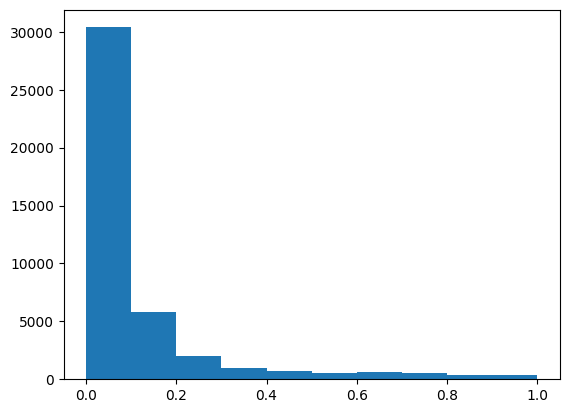

In [134]:
plt.hist(df['target_predicho'])

In [135]:
df[['target','target_predicho','target_predicho_dic','ID']].sample(10)

,target,target_predicho,target_predicho_dic,ID
20866,no,0.011412,False,20867
42762,no,0.245906,False,42763
34954,no,0.065150,False,34955
11122,no,0.031865,False,11123
36224,no,0.091077,False,36225
37721,no,0.032906,False,37722
1179,no,0.016882,False,1180
43498,no,0.013594,False,43499
12477,no,0.051405,False,12478
22183,si,0.317454,False,22184


## MODELO PREDICTIVO CON 'DATA_TEST'

In [136]:
og_test = pd.read_csv('Data_Test.csv', sep = ';')
df_test = og_test.copy()

In [137]:
df_test.dropna(subset=['educacion'], inplace=True)

df_test.isnull().sum()

ID                                  0
edad                                0
trabajo                             0
estado_civil                        0
educacion                           0
deuda                               0
saldo                               0
vivienda                            0
prestamo                            0
tipo_contacto                    1233
duracion                            0
fecha_contacto                      0
campaign                            0
tiempo_transcurrido                 0
contactos_anteriores                0
resultado_campanas_anteriores    3494
target                              0
dtype: int64

In [138]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df_test[['tipo_contacto', 'resultado_campanas_anteriores']] = df_test[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df_test.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [139]:
df_test_model = df_test.copy()
df_test_model.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
2411,52412,48,technician,casado,secundaria/superiores,no,178,si,no,Sin Información,320,17-jun-2021,4,-1,0,Sin Información,no
1423,51424,36,technician,casado,universitarios,no,60,no,no,movil,209,19-aug-2021,2,-1,0,Sin Información,no
2043,52044,28,admin.,casado,secundaria/superiores,no,12,si,no,movil,73,30-jan-2021,3,256,3,otro,no


In [140]:
df_test_model.loc[df_test_model['target'] == 'no', 'target'] = 0
df_test_model.loc[df_test_model['target'] == 'si', 'target'] = 1
df_test_model['target'] = df_test_model['target'].astype(int)

In [162]:
df_test_model.sample(5)

,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
1791,49,306,285,7,-1,0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
500,45,-249,92,1,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4155,47,3333,114,2,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1745,31,33,165,4,-1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1088,40,6767,97,2,-1,0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [142]:
# Reemplaza el valor erróneo en la columna 'educacion'
df_test_model['educacion'] = df_test_model['educacion'].replace('priamaria', 'primaria')


In [143]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df_test['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    2271
universitarios           1318
priamria                  666
Name: count, dtype: int64


In [144]:
columns_to_delete = ['fecha_contacto', 'ID','target']
df_test_model.drop(columns=columns_to_delete,inplace=True)

df_test_model.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores
742,45,self-employed,casado,secundaria/superiores,no,706,no,no,movil,78,2,176,1,exito
3652,44,management,soltero,universitarios,no,-1313,si,si,movil,104,10,-1,0,Sin Información
1767,47,management,casado,universitarios,no,-50,no,si,movil,175,1,-1,0,Sin Información


In [145]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_test_model[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_test_model[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_test_model.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_test_model=pd.concat([df_test_model,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_test_model.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_test_model.shape)
df_test_model.sample(5)

(4255, 37)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
2620,58,-123,131,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,55,2749,58,2,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1507,29,3,183,1,-1,0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3989,55,-966,104,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
151,29,451,451,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


* falta cambiar las celdas de abajo

In [146]:
y_pred_base_datos_test = model_std.predict_proba(df_test_model)

c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [147]:
y_pred_base_datos_test

array([[1.01224086e-07, 9.99999899e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [148]:


# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df_test['target_predicho_test'] = y_pred_base_datos_test[:,1]
df_test['target_predicho_dic_test'] = df_test['target_predicho_test'] > 0.65

df_test.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho_test,target_predicho_dic_test
4166,54167,34,technician,soltero,universitarios,no,586,si,no,Sin Información,489,16-may-2021,2,-1,0,Sin Información,no,1.0,True
1249,51250,57,retired,casado,secundaria/superiores,no,49,si,si,movil,93,25-aug-2021,4,-1,0,Sin Información,no,1.0,True
1281,51282,28,unemployed,soltero,secundaria/superiores,no,16,no,no,movil,119,12-aug-2021,4,-1,0,Sin Información,no,1.0,True


In [161]:
df_test[['target','target_predicho_test','target_predicho_dic_test','ID']].sample(10)

,target,target_predicho_test,target_predicho_dic_test,ID
1123,no,1.0,True,51124
2035,si,1.0,True,52036
2932,no,1.0,True,52933
1312,no,1.0,True,51313
4340,no,1.0,True,54341
988,si,1.0,True,50989
4122,no,1.0,True,54123
2420,si,1.0,True,52421
1404,no,1.0,True,51405
2696,no,1.0,True,52697


In [160]:
df_test['target_predicho_dic_test'].value_counts()

target_predicho_dic_test
True     4244
False      11
Name: count, dtype: int64